<div style="
    background-color: #F4F6F7; 
    color: #2C3E50; 
    padding: 20px; 
    text-align: center; 
    border-radius: 10px; 
    border-left: 8px solid #5F9EA0; 
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
    <h1 style="margin: 0; padding-bottom: 5px;dashed #5F9EA0;">
        Customer Segmentation Analysis
    </h1>
    <h3 style="margin-top: 15px; font-weight: normal; font-style: italic; color: #34495E;">
        Unveiling Hidden Patterns in Consumer Behavior using Unsupervised Learning
    </h3>
</div>

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
📑 Table of Contents</h2>

| Section | Description |
| :--- | :--- |
| **1. Environmental Setup & Data Ingestion** | Environment configuration, library imports, and dataset loading. |
| **2. Data Diagnostics & Preprocessing** | Quality checks (missing values, duplicates) and statistical summaries. |
| **3. Exploratory Data Analysis (EDA)** | Visualizing distributions and spending trends across demographics. |
| **4. Heuristic Segmentation (Manual Logic)** | Classifying customers based on median splits (Logic-based approach). |
| **5. K-Means Clustering Implementation** | Preprocessing, finding optimal $K$, and generating ML-based segments. |
| **6. Cluster Profiling & Interpretation** | Interpreting the characteristics of each cluster (e.g., "VIPs"). |
| **7. Advanced Anomaly Detection (DBSCAN)** | Using DBSCAN to find noise and anomalies in the data. |
| **8. Strategic Insights & Conclusion** | Summarizing key findings, ranking segments by value, and exporting final results. |

<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
Introduction and Project Overview</h1>

In the modern retail ecosystem, the "one-size-fits-all" marketing approach is obsolete. Success lies in precision—understanding not just *who* your customers are, but *how* they behave. This project leverages the **Mall Customers Dataset** to transform raw transactional data into actionable business intelligence through the power of **Unsupervised Machine Learning**.

Our analysis unfolds in a structured narrative:
1.  **Exploratory Data Analysis (EDA):** We begin by dissecting the demographic landscape—Age, Income, and Gender—to uncover initial correlations and hidden patterns.
2.  **Heuristic Segmentation:** Before applying complex algorithms, we attempt a logical, rule-based segmentation to establish a baseline understanding of our customer base (e.g., distinguishing "Savers" from "Spenders").
3.  **K-Means Clustering:** The core of our study. We implement the K-Means algorithm to mathematically group customers into distinct "tribes." We validate our cluster count ($K$) using rigorous techniques like the **Elbow Method** and **Silhouette Analysis**.
4.  **Advanced Anomaly Detection:** Finally, we deploy **DBSCAN** to identify outliers—unique customers who defy standard classification and may represent niche opportunities or data noise.

By the end of this notebook, we will have a segmented customer profile ready for targeted marketing strategies.

<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
1. Environmental Setup & Data Ingestion</h1>

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
1.1 Importing Libraries & Configuring Aesthetics</h2>

To ensure a robust analysis, we establish a foundational environment using standard Data Science libraries: **Pandas** and **NumPy** for data manipulation, and **Seaborn/Matplotlib** for visualization.

Crucially, we define a custom **"Teal Corporate Palette"** at the start. This ensures that every chart generated in this report maintains a consistent, professional visual identity, avoiding the default rainbow colors that can distract from the insights.

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

# Visual Aesthetics (The "Corporate Teal" Theme)
teal_corporate_palette = [
    "#5F9EA0", "#3A6F73", "#8FBFC1", 
    "#4A5D73", "#2C3E50", "#AAB7B8"
]
my_teal_color = "#3A6F73"
sns.set_palette(teal_corporate_palette)

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
1.2 Data Loading & Initial Inspection</h2>

We proceed by loading the `Mall_Customers.csv` dataset. The initial inspection involves checking the dataset's **dimensions (Shape)** to understand the volume of data we are working with, followed by peeking at the **Head** (first 5 rows) and **Tail** (last 5 rows). This step is vital to verify that the data has been ingested correctly and to get a first glimpse of the feature columns.

In [2]:
path= '/kaggle/input/mall-customers/Mall_Customers.csv'
df= pd.read_csv(path)

print(f'Shape of Dataset: {df.shape}')
print('-' * 30 + '\nDataset Preview (First 5 Rows):\n')
display(df.head())
print('-' * 30 + '\nDataset Preview (Last 5 Rows):\n')
display(df.tail())

Shape of Dataset: (200, 5)
------------------------------
Dataset Preview (First 5 Rows):



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


------------------------------
Dataset Preview (Last 5 Rows):



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
2. Data Diagnostics & Preprocessing</h1>

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
2.1 Data Quality Checks</h2>

Before diving into analysis, we must ensure data integrity. We perform a "sanity check" to scan for **missing values (NaNs)** that could crash our models and **duplicate entries** that could skew our statistical results. We also use `.info()` to verify data types (integers vs. strings).

In [3]:
print("Missing Values in Data:", df.isnull().sum().sum())
print("Duplicated Values in Data:", df.duplicated().sum().sum())

Missing Values in Data: 0
Duplicated Values in Data: 0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
2.2 Statistical Summary</h2>

Understanding the "shape" of our variables is crucial. We separate our analysis into:
* **Numerical Statistics:** To check the central tendency (mean) and spread (std) of Age, Income, and Spending Score.
* **Categorical Statistics:** To see the frequency of non-numeric variables like Gender.

In [5]:
# Statistical Summary
print("Numerical Statistics:")
display(df.describe().T)

print("\nCategorical Statistics:")
display(df.describe(include='object').T)

Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0



Categorical Statistics:


,count,unique,top,freq
Genre,200,2,Female,112


<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
2.3 Feature Engineering & Cleaning</h2>

Raw data is rarely ready for modeling. In this step, we refine our dataset:
1.  **Drop `CustomerID`:** This is a unique identifier with no analytical value; keeping it would confuse our clustering algorithm.
2.  **Rename `Genre`:** We standardize the column name to `Gender` for clarity.
3.  **Binning (Feature Construction):** We create new categorical "buckets" for **Age** (e.g., Young, Senior) and **Income** (e.g., Low, High). This simplifies complex continuous data into interpretable groups for our initial analysis.

In [6]:
df.drop(columns=['CustomerID'], inplace=True)
df = df.rename(columns={'Genre': 'Gender'})

bins_age = [18, 30, 50, 70]
labels_age = ['Young', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, include_lowest=True)

bins_income = [0, 40, 85, 140]
labels_income = ['Low', 'Average', 'High']
df['Income_Level'] = pd.cut(df['Annual Income (k$)'], bins=bins_income, labels=labels_income, include_lowest=True)

print("\nNew Data Structure:")
display(df.head())


New Data Structure:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Income_Level
0,Male,19,15,39,Young,Low
1,Male,21,15,81,Young,Low
2,Female,20,16,6,Young,Low
3,Female,23,16,77,Young,Low
4,Female,31,17,40,Adult,Low


<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
3. Exploratory Data Analysis (EDA)</h1>

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
3.1 Univariate Analysis: Who are our customers?</h2>

We start by examining the distribution of our individual features. The count plots below reveal the composition of our dataset in terms of **Age Groups** and **Income Levels**. This gives us a baseline demographic profile.

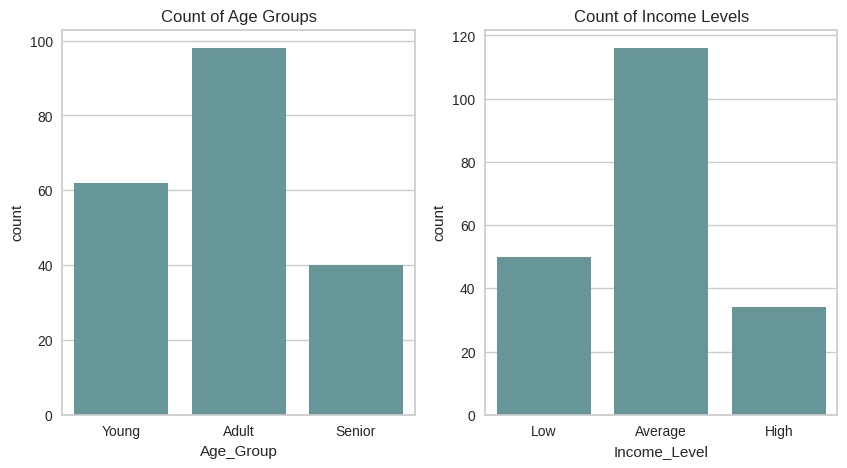

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Age_Group', data=df)
plt.title('Count of Age Groups')

plt.subplot(1, 2, 2)
sns.countplot(x='Income_Level', data=df)
plt.title('Count of Income Levels')

plt.show()

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
3.2 Bivariate Analysis: What drives spending?</h2>

Next, we investigate how different demographics influence spending habits.
1.  **Boxplots:** We compare spending scores across Gender, Age, and Income. Surprisingly, we look for overlaps—if the boxes look similar, that feature might not be a strong segregator on its own.
2.  **Scatter Plot (The Golden Clusters):** This is the most critical visualization. By plotting **Income vs. Spending**, we can visually spot distinct groups (clusters) forming naturally. This confirms that segmentation is possible.

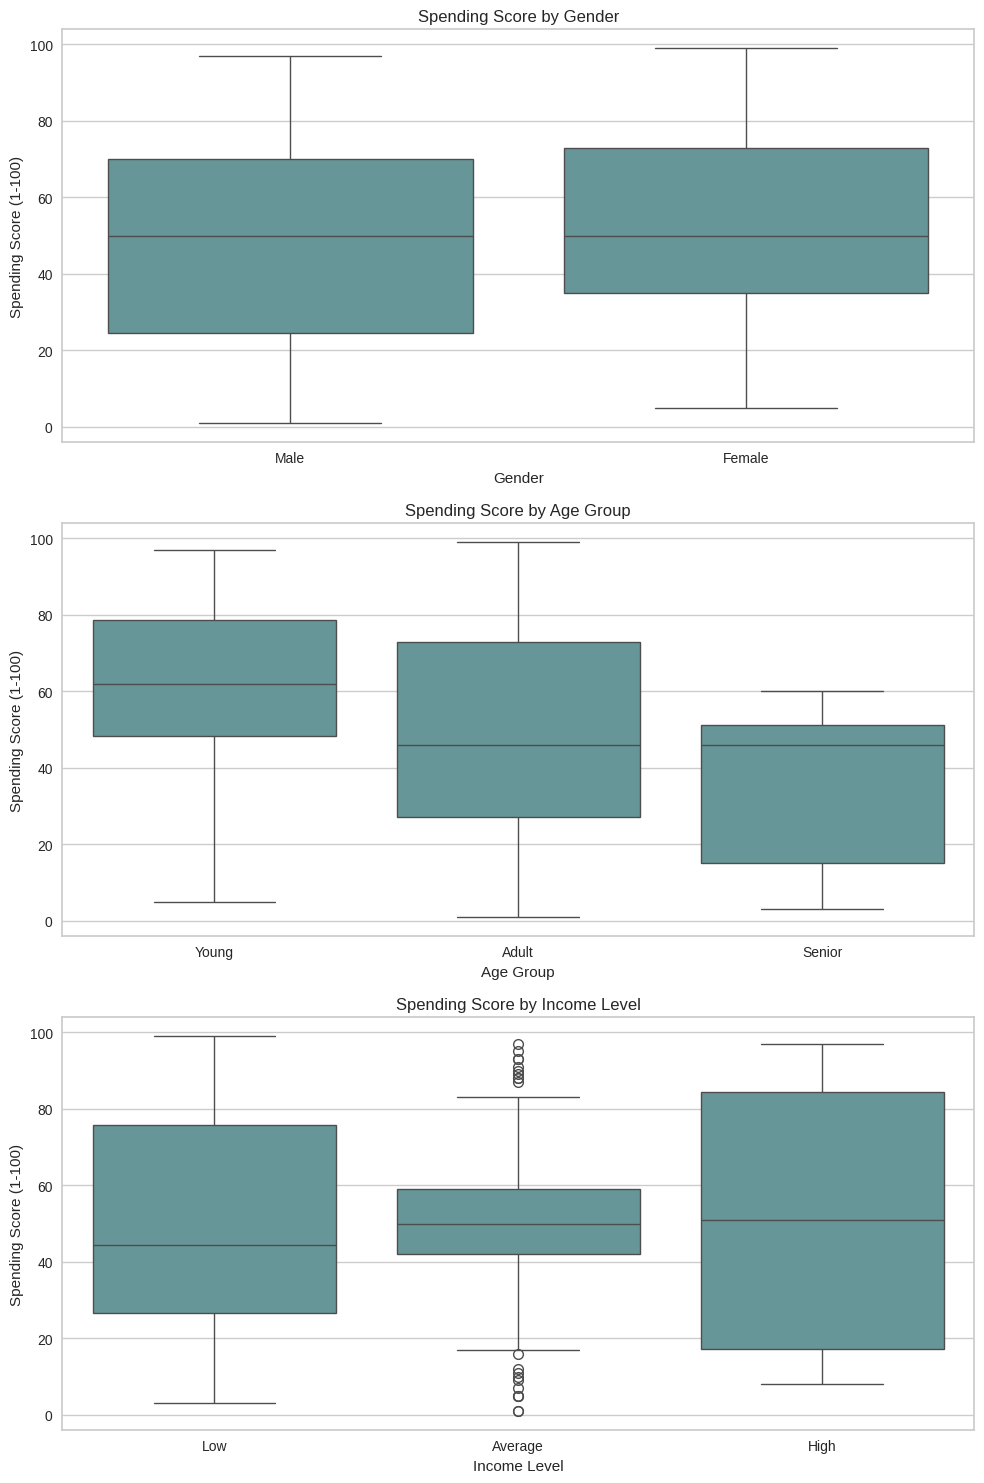

In [8]:
# 1. Boxplots for Demographics
plt.figure(figsize=(10, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.xlabel('Gender')

plt.subplot(3, 1, 2)
sns.boxplot(x='Age_Group', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Age Group')
plt.xlabel('Age Group')

plt.subplot(3, 1, 3)
sns.boxplot(x='Income_Level', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Income Level')
plt.xlabel('Income Level')

plt.tight_layout()
plt.show()

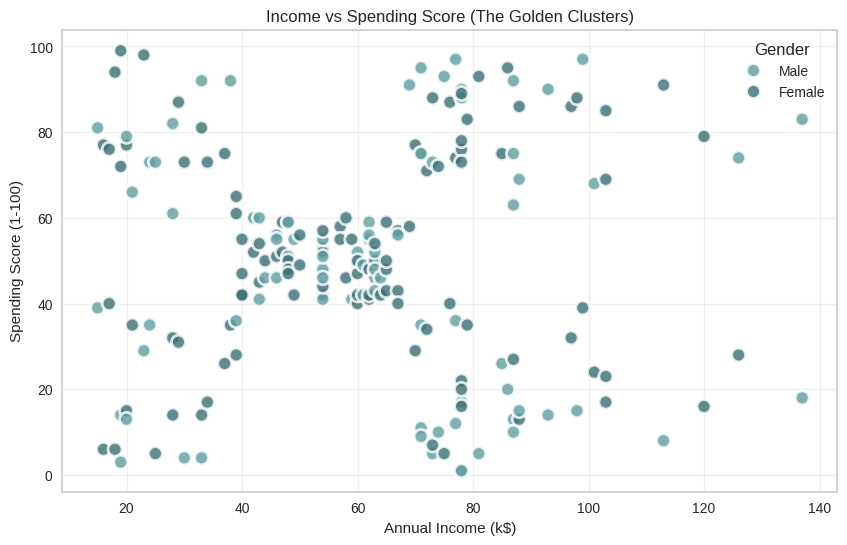

In [9]:
# 2. The Golden Clusters Scatter Plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=df, hue='Gender', s=100, alpha=0.8,
                edgecolor='white', linewidth=2
                )

plt.title('Income vs Spending Score (The Golden Clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender', loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
3.3 Multivariate Analysis: The "Spending Cliff"</h2>

We dive deeper to find complex patterns:
* **Pairplot:** To see pairwise relationships across all variables.
* **Violin Plot:** Combines boxplots with density estimation to show the "shape" of spending across ages.
* **Trend Line:** We calculate the average spending score for every 5-year age bin. This reveals a potential "Spending Cliff"—a specific age where customer spending drops significantly.

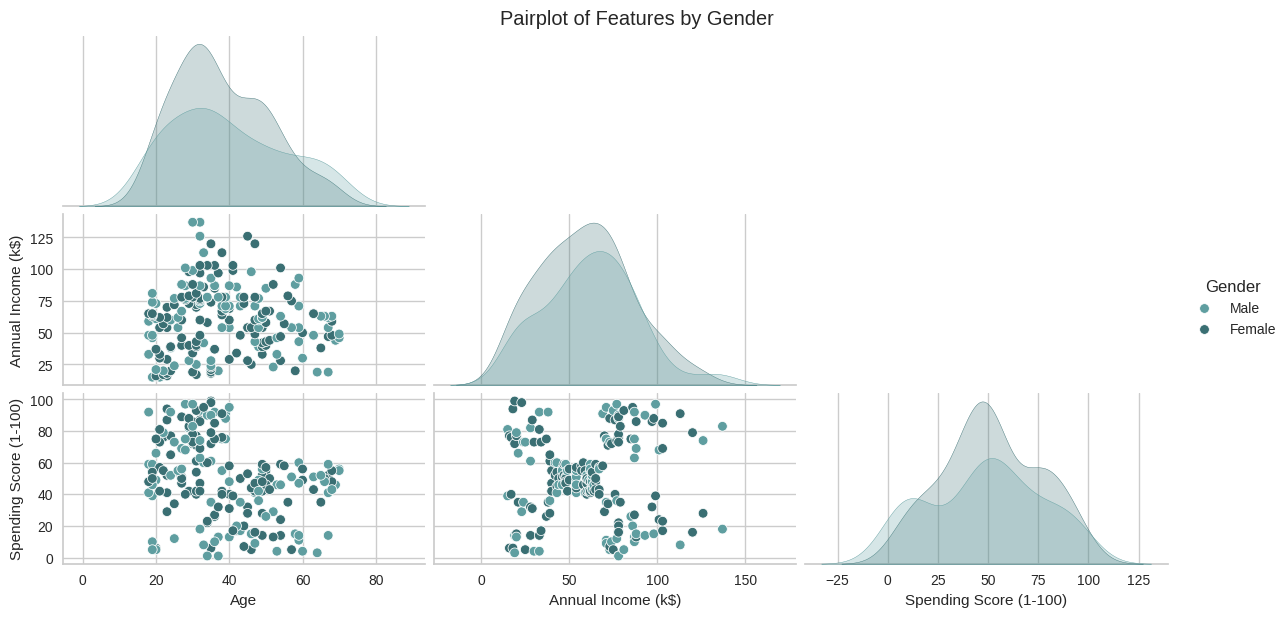

In [10]:
cols_to_drop = ['Age_Group', 'Income_Level']

sns.pairplot(df.drop(cols_to_drop, axis=1, errors='ignore'),
             hue='Gender',
             height=2, aspect=2,
             corner=True)

plt.suptitle('Pairplot of Features by Gender', y=1.02)
plt.show()

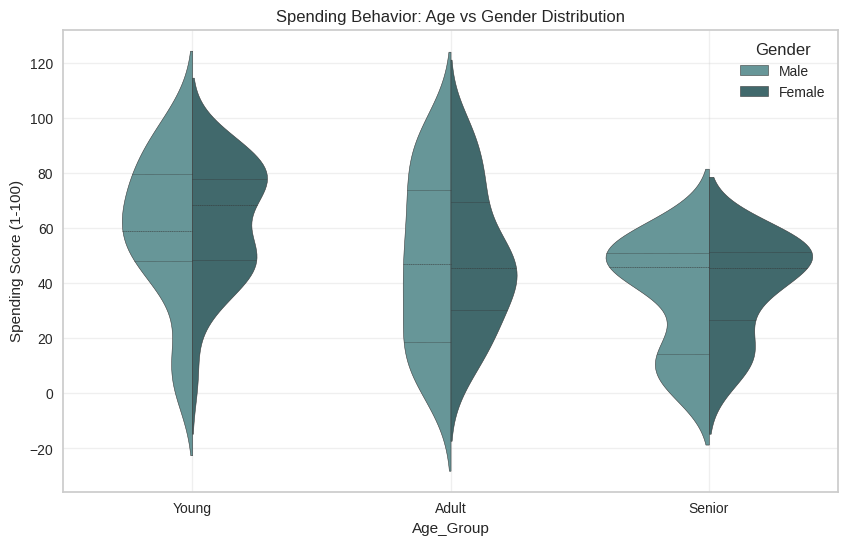

In [11]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Age_Group', y='Spending Score (1-100)', hue='Gender',
               data=df, split=True, inner='quartile')

plt.title('Spending Behavior: Age vs Gender Distribution')
plt.grid(True, alpha=0.3)
plt.show()

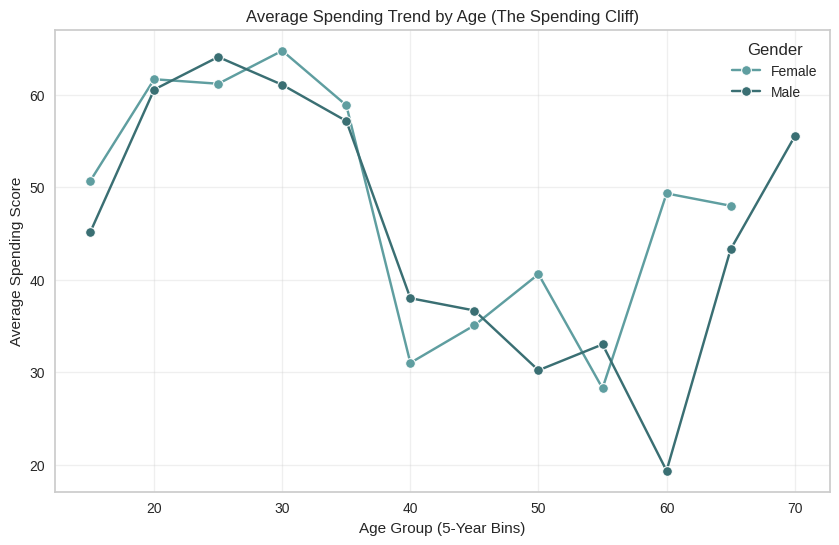

In [12]:
# Trend Analysis
df_trend = df.copy()
df_trend['Age_Bin_5'] = (df_trend['Age'] // 5) * 5

age_trend = df_trend.groupby(['Age_Bin_5', 'Gender'])['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_trend, x='Age_Bin_5', y='Spending Score (1-100)',
             hue='Gender', marker='o', palette=teal_corporate_palette)

plt.title('Average Spending Trend by Age (The Spending Cliff)')
plt.xlabel('Age Group (5-Year Bins)')
plt.ylabel('Average Spending Score')
plt.grid(True, alpha=0.3)
plt.show()

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
3.4 Correlation Matrix & Heatmaps</h2>

Finally, we quantify the relationships using a **Correlation Matrix**. We check if Age, Income, or Gender have a strong linear relationship with Spending Score. We also use a Pivot Table heatmap to visualize the density of our customer base across Age and Income brackets.

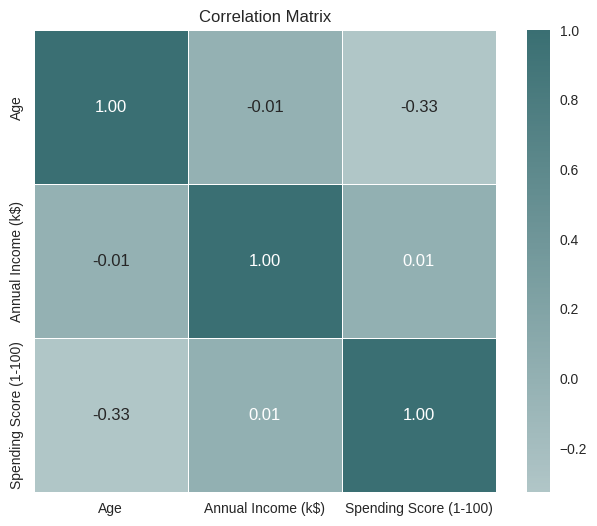

In [13]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr,center=0,
            annot=True, fmt='.2f',
            square=True, linewidths=0.5,
            cmap=sns.light_palette(my_teal_color, as_cmap=True))

plt.title('Correlation Matrix')
plt.show()

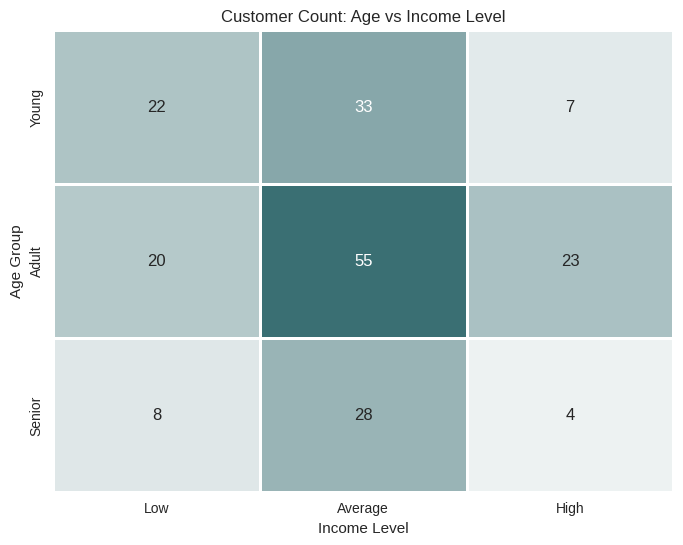

In [14]:
pivot_table = pd.crosstab(df['Age_Group'], df['Income_Level'])

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d',
            linewidths=1, cbar=False,
            cmap=sns.light_palette(my_teal_color, as_cmap=True))

plt.title('Customer Count: Age vs Income Level')
plt.xlabel('Income Level')
plt.ylabel('Age Group')
plt.show()

<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
4. Heuristic Segmentation (Manual Logic)</h1>

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
4.1 VIP Customer Profile (Score > 80)</h2>

Before building complex models, we isolate the "Whales"—customers with a Spending Score above 80. Analyzing this elite group reveals key insights about our most valuable shoppers (e.g., are they mostly young? Male or Female?).

In [15]:
top_spenders = df[df['Spending Score (1-100)'] > 80]

print(f"VIP Customer Analysis (Score > 80)")
print(f"Number of VIPs: {len(top_spenders)}")

VIP Customer Analysis (Score > 80)
Number of VIPs: 30


In [16]:
print("\n[ Demographics ]")
display(top_spenders[['Age', 'Annual Income (k$)']].describe().loc[['mean', 'min', 'max']].T)

print("\n[ Gender Distribution ]")
print(top_spenders['Gender'].value_counts(normalize=True).round(2))


[ Demographics ]


,mean,min,max
Age,30.600000,18.0,40.0
Annual Income (k$),69.066667,15.0,137.0



[ Gender Distribution ]
Gender
Female    0.53
Male      0.47
Name: proportion, dtype: float64


<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
4.2 The Quadrant Strategy (Median Split)</h2>

Here, we apply a classic business matrix. We calculate the **Median Income** and **Median Spending Score** to draw two crossing lines, dividing our customers into four distinct logical quadrants:

1.  **Target:** High Income, High Spend (The Ideal Customer).
2.  **Savers:** High Income, Low Spend (Potential to convert).
3.  **Careless:** Low Income, High Spend (Risk of churning).
4.  **Conservative:** Low Income, Low Spend.

The scatter plot below visualizes these 4 manually created segments.

In [17]:
income_median = df['Annual Income (k$)'].median()
score_median = df['Spending Score (1-100)'].median()

def classify_customer(row):
    if row['Annual Income (k$)'] > income_median and row['Spending Score (1-100)'] > score_median:
        return 'Target (High Income - High Spend)'
    elif row['Annual Income (k$)'] > income_median and row['Spending Score (1-100)'] <= score_median:
        return 'Savers (High Income - Low Spend)'
    elif row['Annual Income (k$)'] <= income_median and row['Spending Score (1-100)'] > score_median:
        return 'Careless (Low Income - High Spend)'
    else:
        return 'Conservative (Low Income - Low Spend)'

df['Customer_Category'] = df.apply(classify_customer, axis=1)

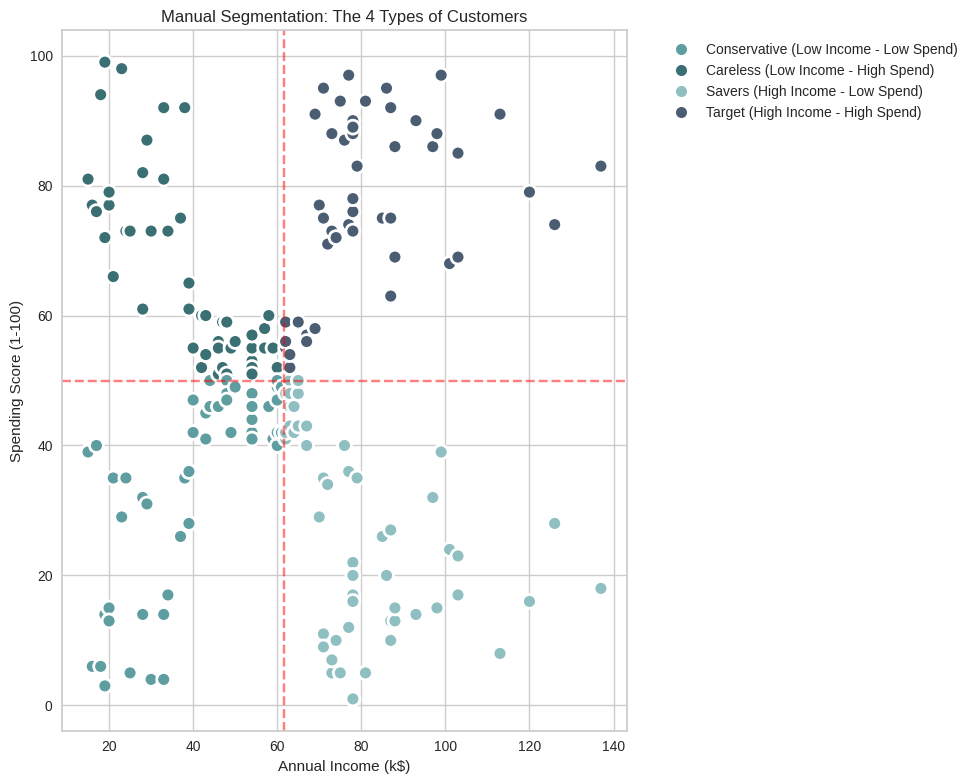


Customer Segments Distribution:


Customer_Category
Savers (High Income - Low Spend)         52
Conservative (Low Income - Low Spend)    51
Careless (Low Income - High Spend)       49
Target (High Income - High Spend)        48
Name: count, dtype: int64

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Customer_Category', s=100, edgecolor='white', linewidth=2)

plt.axvline(x=income_median, color='red', linestyle='--', alpha=0.5)
plt.axhline(y=score_median, color='red', linestyle='--', alpha=0.5)

plt.title('Manual Segmentation: The 4 Types of Customers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nCustomer Segments Distribution:")
display(df['Customer_Category'].value_counts())

<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
5. K-Means Clustering Implementation</h1>

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
5.1 Preprocessing: Standardization</h2>

Machine Learning algorithms like K-Means calculate distance to determine similarity. If one feature has a large range (e.g., Income: 15,000–137,000) and another has a small range (e.g., Score: 1–100), the larger number will dominate the calculation.

To prevent this bias, we use **StandardScaler** to transform our data so that all features contribute equally to the result.

In [19]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Data: ")
display(X_scaled_df.head())

Scaled Data: 


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
5.2 Determining Optimal Clusters (K)</h2>

How do we know if we should have 3, 4, or 5 customer segments? We don't guess; we use math.
1.  **Elbow Method:** We plot the error rate as we add more clusters. We look for the "elbow" point where adding more clusters stops giving us significant gains.
2.  **Silhouette Analysis:** This visualizes how well-separated the clusters are. A higher score means better-defined groups.

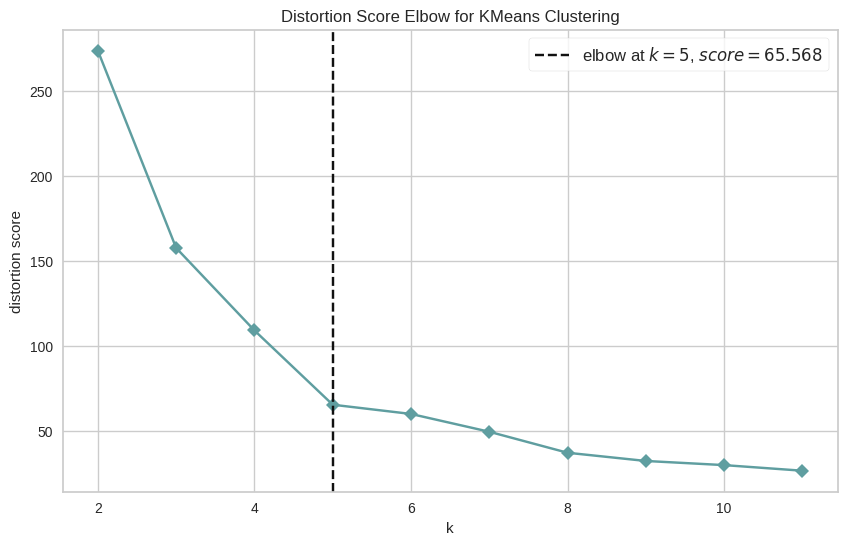

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

plt.figure(figsize=(10, 6))
visualizer.fit(X_scaled)
visualizer.show()

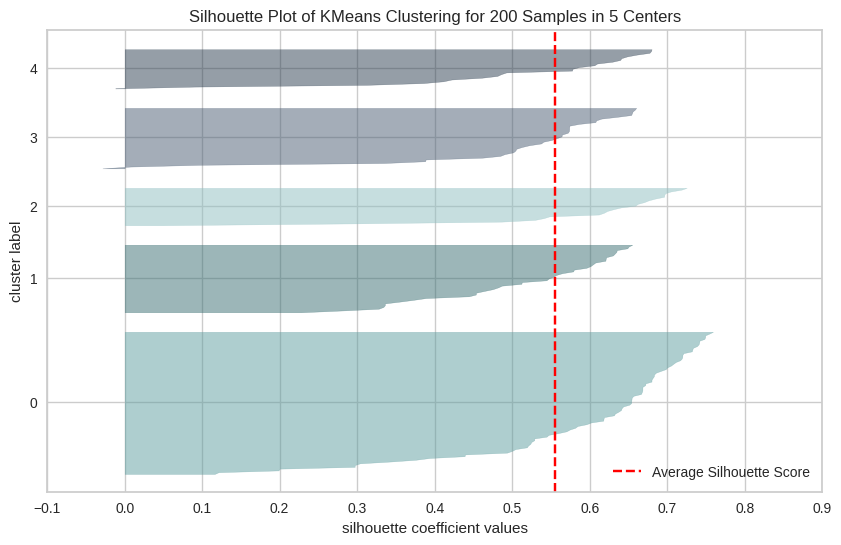

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
model_5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(
    model_5, 
    colors=teal_corporate_palette)

plt.figure(figsize=(10, 6))
visualizer.fit(X_scaled)
visualizer.show()

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
5.3 Model Fitting & Result Visualization</h2>

Based on the Elbow Method (which suggests K=5), we initialize our final K-Means model with **5 clusters**. The scatter plot below shows the mathematical reality of our customer segments, with the **Last X marks** indicating the centroid (center of gravity) for each group.

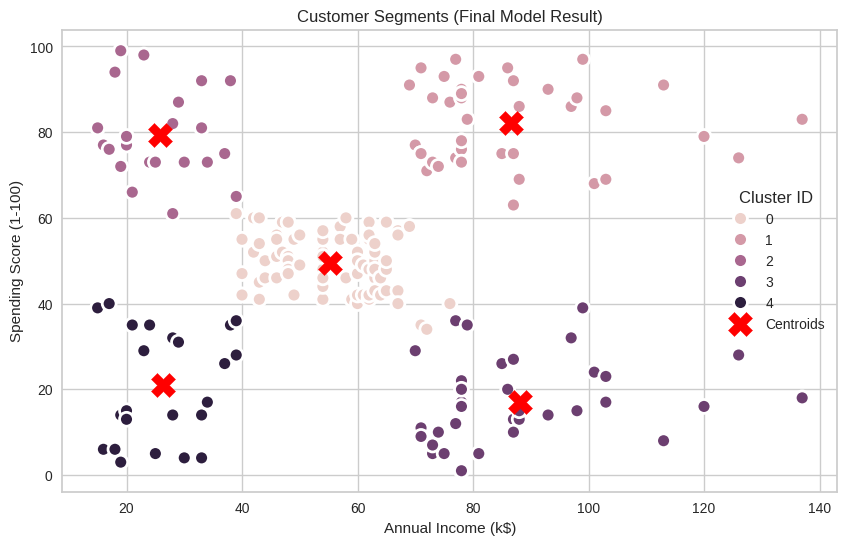

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', s=100, legend='full', edgecolor='white', linewidth=2)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments (Final Model Result)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster ID')
plt.show()

<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
6. Cluster Profiling & Interpretation</h1>

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
6.1 Statistical Profiling: Who are they?</h2>

Now that we have our clusters, we must interpret them. We calculate the **mean values** for Age, Income, and Spending Score for each cluster.

The Boxplots below act as a "fingerprint" for each group:
* **Income Boxplot:** Tells us if the group is wealthy or budget-conscious.
* **Spending Boxplot:** Tells us if they are big spenders or savers.
* **Age Boxplot:** Reveals if they are younger trends-setters or older established shoppers.

In [23]:
profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
profile['Count'] = df['Cluster'].value_counts()
profile

,Age,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,,
0,42.7,55.3,49.5,81
1,32.7,86.5,82.1,39
2,25.3,25.7,79.4,22
3,41.1,88.2,17.1,35
4,45.2,26.3,20.9,23


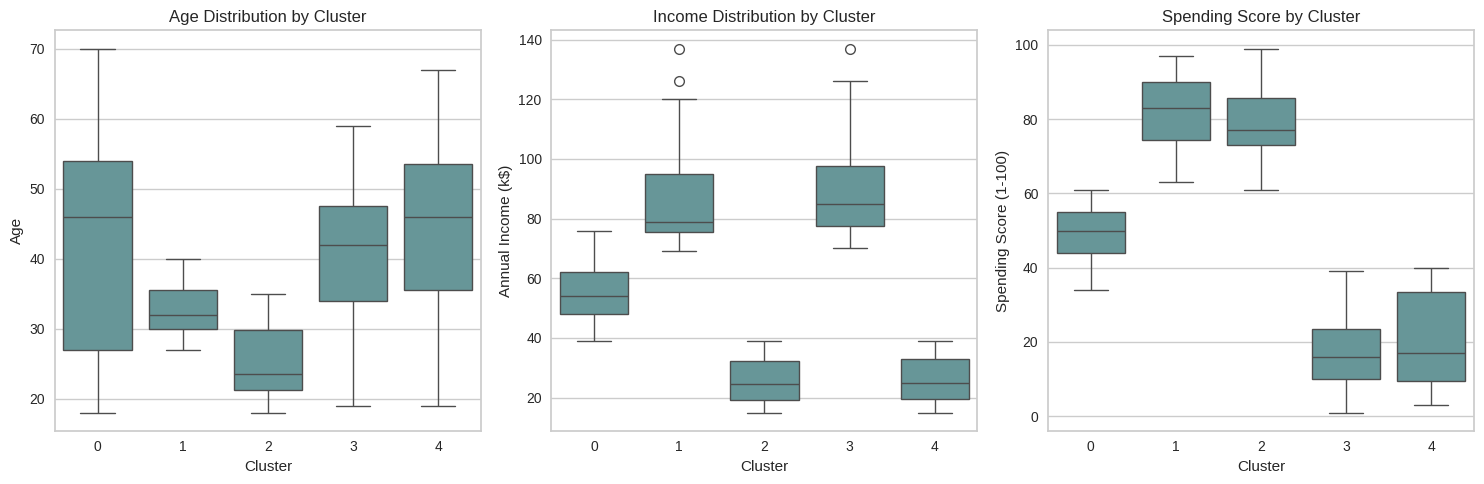

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Income Distribution by Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Cluster')

plt.tight_layout()
plt.show()

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
6.2 Business Labeling: Naming the Tribes</h2>

Cluster numbers (0, 1, 2, 3, 4) are meaningless to a marketing team. We need descriptive names.

We create a function `get_cluster_label` that looks at the centroids (average Income and Score) of each cluster and assigns a logical name:
* **VIP:** High Income & High Spend.
* **Saver:** High Income & Low Spend.
* **Careless:** Low Income & High Spend.
* **Conservative:** Low Income & Low Spend.
* **Average:** The middle ground.

In [25]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['Income', 'Score'])
centroid_df['Cluster_ID'] = range(5)

def get_cluster_label(row):
    income = row['Income']
    score = row['Score']

    if income > 70 and score > 60:
        return "VIP (High Income, High Spend)"
    elif income > 70 and score < 40:
        return "Saver (High Income, Low Spend)"
    elif income < 40 and score > 60:
        return "Careless (Low Income, High Spend)"
    elif income < 40 and score < 40:
        return "Conservative (Low Income, Low Spend)"
    else:
        return "Average (Middle Class)"

centroid_df['Cluster_Name'] = centroid_df.apply(get_cluster_label, axis=1)
cluster_map = dict(zip(centroid_df['Cluster_ID'], centroid_df['Cluster_Name']))

df['Cluster_Name'] = df['Cluster'].map(cluster_map)

<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
7. Advanced Anomaly Detection (DBSCAN)</h1>

K-Means is excellent, but it has a flaw: it forces *every* customer into a cluster, even if they don't fit well.

To solve this, we introduce **DBSCAN** (Density-Based Spatial Clustering). Unlike K-Means, DBSCAN looks for high-density areas. If a point is in a low-density region (far from others), it labels it as **Noise (-1)**.

These "Outliers" are crucial. They might be:
1.  **Fraud cases.**
2.  **Unique high-value customers** who need special attention.
3.  **Data errors.**

In [26]:
dbscan = DBSCAN(eps=0.4, min_samples=9)
clusters_dbscan = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = clusters_dbscan

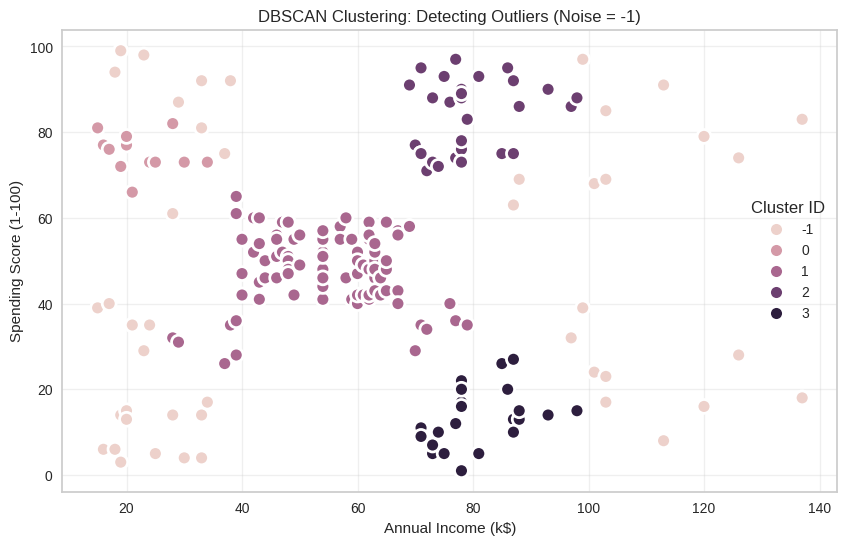

Number of Outliers detected by DBSCAN: 45


In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='DBSCAN_Cluster', s=100,
                edgecolor='white', linewidth=2)

plt.title('DBSCAN Clustering: Detecting Outliers (Noise = -1)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster ID')
plt.grid(True, alpha=0.3)
plt.show()

n_noise = list(clusters_dbscan).count(-1)
print(f"Number of Outliers detected by DBSCAN: {n_noise}")

<h1 style="
    background-color: #F4F6F7;
    color: #2C3E50;
    padding: 20px;
    text-align: center;
    border-radius: 10px;
    border-left: 8px solid #5F9EA0;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
">
8. Strategic Insights & Conclusion</h1>

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
8.1 Which segment is most valuable?</h2>

Finally, we summarize our findings. The bar chart below ranks our new segments by **Average Spending Score**. This clearly identifies our "VIP" and "Careless" segments as the primary drivers of revenue, while "Savers" represent a huge opportunity for up-selling campaigns.

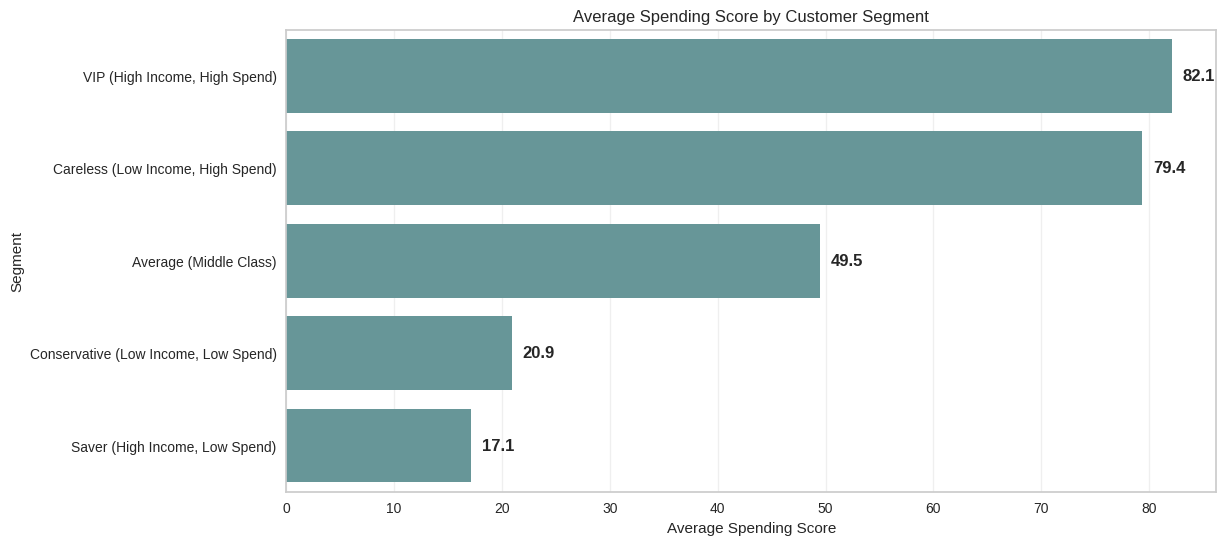

In [28]:
avg_spending = df.groupby('Cluster_Name')['Spending Score (1-100)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_spending.values, y=avg_spending.index)

plt.title('Average Spending Score by Customer Segment')
plt.xlabel('Average Spending Score')
plt.ylabel('Segment')
plt.grid(axis='x', alpha=0.3)

for index, value in enumerate(avg_spending.values):
    plt.text(value + 1, index, f'{value:.1f}', va='center', fontweight='bold')

plt.show()

<h2 style="
    color: #3A6F73;
    font-size: 22px;
    margin-top: 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    border-bottom: 2px solid #E0E6E8;
    padding-bottom: 8px;
">
8.2 Deployment: Exporting the Results</h2>

In [29]:
df_final = pd.read_csv(path)
df_final['Cluster'] = df['Cluster']
df_final['Cluster_Name'] = df['Cluster_Name']
df_final.to_csv('Mall_Customers_Segmented.csv', index=False)
display(df_final[['CustomerID', 'Cluster', 'Cluster_Name']].head())

,CustomerID,Cluster,Cluster_Name
0,1,4,"Conservative (Low Income, Low Spend)"
1,2,2,"Careless (Low Income, High Spend)"
2,3,4,"Conservative (Low Income, Low Spend)"
3,4,2,"Careless (Low Income, High Spend)"
4,5,4,"Conservative (Low Income, Low Spend)"
